#**Biblioteca Keras**

 É uma biblioteca que facilita a construção e o treinamento de modelos de deep learning.

# *Dataset MNIST (biblioteca Keras)*

Base de dados de dígitos manuscritos. O MNIST têm 60000 imagens rotuladas para treinamento e 10000 para testes. O MNIST pode ser importado da biblioteca Keras para ser utilizado no Colab.

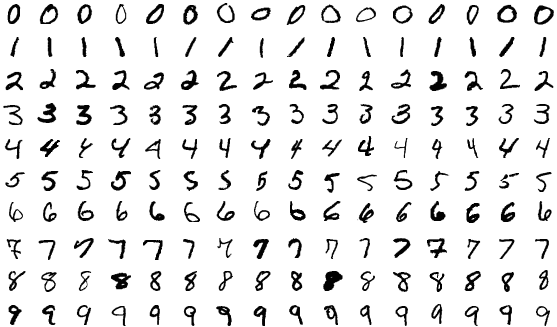



##**1 - Carregando as bibliotecas**##

In [13]:
import keras
from keras import datasets, models, layers, utils, backend
import cv2, random, os
import numpy as np
from matplotlib import pyplot as plt

np.random.seed(100) # Define a semente para o NumPy
random.seed(100) # Define a semente para o gerador de números aleatórios do Python.
utils.set_random_seed(100)
#tf.random.set_seed(10) # Define a semente para o TensorFlow.
os.environ['PYTHONHASHSEED'] = str(100) # Define a semente para o hash do Python, garantindo a reprodutibilidade completa.

##**2 - Formantando os dados de entrada**

In [14]:
backend.set_image_data_format('channels_last')

(X_train, Y_train), (X_val, Y_val) = datasets.mnist.load_data()

image = X_train[0]

X_train = X_train.astype('float32')/255.0
X_val = X_val.astype('float32')/255.0

Y_train = utils.to_categorical(Y_train)
Y_val = utils.to_categorical(Y_val)

num_classes = 10

##**3 - Contruindo o modelo da rede neural**

In [15]:
model = models.Sequential()

model.add(layers.Input(shape=(28,28,1)))

model.add(layers.Conv2D(30, (5,5), strides=(1,1), activation='relu'))

model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Dropout(0.3))

model.add(layers.Flatten())

model.add(layers.Dense(128, activation='relu'))

model.add(layers.Dense(64, activation = 'relu'))

model.add(layers.Dense(num_classes, activation = 'softmax', name = 'predict'))

##**4 - Executando o treinamento**

In [16]:
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=3, batch_size=200)

Epoch 1/3
300/300 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8268 - loss: 0.5705 - val_accuracy: 0.9735 - val_loss: 0.0902
Epoch 2/3
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9726 - loss: 0.0913 - val_accuracy: 0.9828 - val_loss: 0.0542
Epoch 3/3
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9806 - loss: 0.0629 - val_accuracy: 0.9856 - val_loss: 0.0444


##**5 - Testando a rede treinada com uma imagem que não pertence ao dataset**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
Predição da Classe: 4
Predição (probabilidades):
0.0053
0.0002
0.1145
0.0775
0.5443
0.0001
0.0033
0.0014
0.1996
0.0538


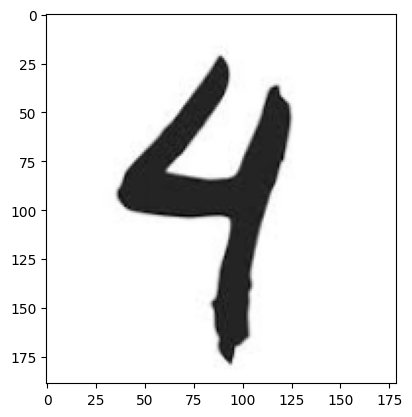

In [17]:
pred_img = cv2.imread('Digito.png',0)

pred_img = pred_img.astype('float32') / 255.0

plt.imshow(pred_img, cmap='gray')

if pred_img.shape != (28,28):
  pred_img = cv2.resize(pred_img, (28,28))

pred_img = pred_img.reshape(1, 28, 28, 1)

pred_proba = model.predict(pred_img)

pred = np.argmax(pred_proba, axis=-1)

print(f'Predição da Classe: {pred[0]}')
print('Predição (probabilidades):')
for proba in pred_proba[0]:
  print(f'{proba:.4f}')

